# Applied Process Mining Module

This notebook is part of an Applied Process Mining module. The collection of notebooks is a *living document* and subject to change. 

# Lecture 2 - 'Process Discovery with the Heuristics Miner' (Python / PM4Py)

## Setup

<img src="https://pm4py.fit.fraunhofer.de/static/assets/images/pm4py-site-logo-padded.png" alt="PM4Py" style="width: 200px;"/>

In this notebook, we are using the [PM4Py library](https://pm4py.fit.fraunhofer.de/) in combination with several standard Python data science libraries:

* [pandas](https://pandas.pydata.org/)
* [plotnine](https://plotnine.readthedocs.io/en/stable/)

In [1]:
## Perform the commented out commands to install the dependencies
# %pip install pandas
# %pip install matplotlib
# %pip install pm4py

In [2]:
import pandas as pd
import pm4py
import plotnine
from plotnine import ggplot, geom_point, aes, theme_bw, coord_flip, scale_y_discrete, theme, element_text, geom_bin2d

## Process Discovery

### Process Models

A common industry standard for Process Model is [BPMN](https://www.bpmn.org/), which can be created by web-based tools like [BPMN.io](https://bpmn.io/) and loaded and used by PM4Py.

In [3]:
import pm4py
import os

bpmn_graph = pm4py.read_bpmn(os.path.join("..", "data", "sepsis.bpmn"))

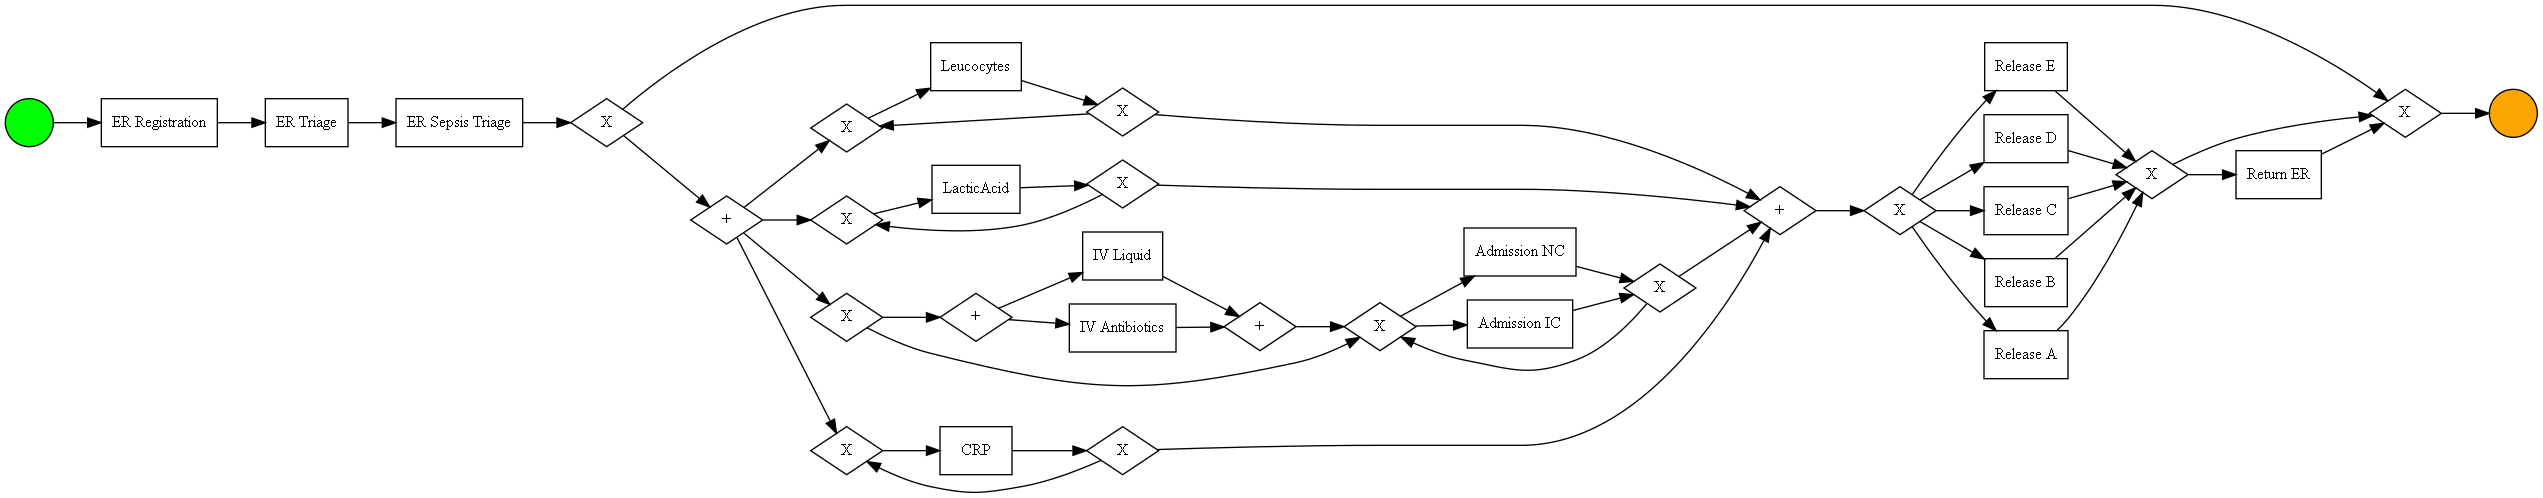

In [4]:
pm4py.vis.view_bpmn(bpmn_graph)

### Quality Dimensions

The quality dimensions `fitness`, `precision`, `simplicity`, and `generalisation` are best illustrated by using a small example event log.
We are using an example event log in XES format that is used in the book `Process Mining - Data Science in Action` by Wil van der Aalst, which is downloaded and stored in the `../data` directory with the code below:

In [6]:
from pm4py.objects.log.importer.xes import importer as xes_importer
example_log = xes_importer.apply('../data/Lfull.xes')

parsing log, completed traces :: 100%|██████████| 1391/1391 [00:00<00:00, 5231.28it/s]


Let us have a look at the event log in tabular form. The mapping of the activity labels to actual activities is:

* a = register request, 
* b = examine thoroughly, 
* c = examine casually, 
* d = check ticket, 
* e = decide, 
* f = reinitiate request, 
* g = pay compensation, and 
* h = reject request.

In [ ]:
pm4py.convert_to_dataframe(example_log)

Now let us discover a process map as we have seen in Lecture 1:

In [ ]:
pm4py.view_dfg(*pm4py.discover_directly_follows_graph(example_log))

Not really very insightful the directly-follows based process map visualization.

#### Four Process Models - One Event Log 🚧

This part is under construction.

### Heuristics Miner 🚧

In [ ]:
L_heur_1 = pd.read_csv("../data/L_heur_1.csv", sep=';')
num_rows = len(L_heur_1)
print("Number of rows: {}".format(num_rows))
L_heur_1_log = pm4py.format_dataframe(L_heur_1, case_id='CASE_concept_name', activity_key='activity_id', timestamp_key='timestamp')

In [ ]:
dfg, sa, ea = pm4py.discover_directly_follows_graph(L_heur_1_log)
pm4py.view_dfg(dfg, sa, ea)

### Dependency Graph 🚧

In PM4Py, there is no option to review the intermediate data structures used for the Heuristics Miner such as the dependency graph.

🚧

### Causal net

The Causal net formalism is called `Heuristics Net` in PM4Py along with the definitions used in the original paper that proposed the Heuristics Miner.

In [ ]:
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner

# due to bug here: https://github.com/pm4py/pm4py-core/issues/220
# we need to convert this to a event log object

L_heur_1_log = pm4py.convert_to_event_log(L_heur_1_log)
L_heur_1_map = pm4py.discover_heuristics_net(L_heur_1_log, dependency_threshold = 0.8, and_threshold = 0.65, loop_two_threshold = 0.5)
pm4py.view_heuristics_net(L_heur_1_map)

#### Convert to BPMN

In [ ]:
from pm4py.objects.conversion.wf_net.variants import to_bpmn

# we need to have an intermediate step to get a Petri net
L_heur_1_petrinet, im, fm = pm4py.convert_to_petri_net(L_heur_1_map)
L_heur_1_bpmn = to_bpmn.apply(L_heur_1_petrinet, im, fm)

In [ ]:
pm4py.view_bpmn(L_heur_1_bpmn)

In [ ]:
from pm4py.objects.petri_net.exporter import exporter as pnml_exporter
pnml_exporter.apply(L_heur_1_petrinet, im, "petri_final.pnml", final_marking=fm)

# Exercises - 2nd Hands-on Session

In the second hands-on session, you are going to explore a real-life dataset (see the Assignment notebook) and apply what was presented in the lecture about event logs and basic process mining visualizations. The objective is to explore your dataset and as an event log and with the learned process mining visualizations in mind.

* Reflect on the kind of process you are analyzing.
    * Are there parallel activities?
    * Are the choices?
* Derive a process model with the Heuristics Miner (bupaR, PM4Py, ProM) and compare it to the visualization provided by commercial tools and the process map visualization.
    * What are the differences?
    * Can you spot any ‘statistics flaws’ in the commercial tools?
* What are the open questions that cannot be answered by a process model alone? 

*Hint*: You may use/copy the code from this notebook to have a starting point. 